In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\sneha\Downloads\Trade_DetailedTradeMatrix_E_All_Data\Trade_DetailedTradeMatrix_E_All_Data_NOFLAG.csv", encoding = 'latin1')

In [3]:
data = data[data['Element'] == 'Import Value'] #to work only with the import values

In [4]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
    'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 
    'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
    'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
    'Central African Republic', 'Chile', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of',
    'China, mainland', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
    'Czechia', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica',
    'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Ethiopia PDR',
    'Faroe Islands', 'Fiji', 'Finland', 'France',  'French Polynesia', 'Gabon', 'Gambia', 'Georgia',
    'Germany', 'Ghana', 'Greece', 'Grenada','Guatemala', 'Guinea', 'Guyana', 'Honduras', 'Hungary',
    'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
    'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia',
    'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Morocco', 'Mozambique',
    'Myanmar', 'Namibia', 'Nepal', 'Netherlands (Kingdom of the)', 'New Caledonia', 'New Zealand', 'Nicaragua',
    'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan',  'Panama', 'Papua New Guinea',
    'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova',
    'Romania', 'Russian Federation', 'Rwanda',  'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
    'Serbia and Montenegro', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands',
    'South Africa', 'Spain', 'Sri Lanka',  'Suriname', 'Sweden', 'Switzerland',
    'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Tuvalu',
    'Türkiye', 'USSR', 'Uganda', 'Ukraine', 'United Arab Emirates',
    'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America',
    'Uruguay', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',  'Zambia', 'Zimbabwe'
]

In [5]:
data = data[data['Reporter Countries'].isin(countries)]
data = data[data['Partner Countries'].isin(countries)]

In [6]:
data = data.fillna(0)

In [7]:

years = [ 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
         'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
         'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
         'Y2020', 'Y2021']

#creating a dictionary to store DataFrames for each year
dfs_by_year = {}

for year in years:
    selected_columns = [  'Element', 'Unit', year, 'Reporter Country Code', 'Reporter Countries', 'Partner Country Code', 'Partner Countries']
    df_by_year = data[selected_columns]
    dfs_by_year[year] = df_by_year


for year in years:
    df_name = f"df{year[1:]}"  # Removing 'Y' from the year
    globals()[df_name] = dfs_by_year[year]

In [8]:
years = [f'Y{i}' for i in range(1995, 2022)]

for year in years:
    subset_df = data[['Reporter Country Code', 'Reporter Country Code (M49)',
       'Reporter Countries', 'Partner Country Code',
       'Partner Country Code (M49)', 'Partner Countries',year ]]
    sum_by_partner_links =  data.groupby(['Reporter Countries', 'Partner Countries'])[year].sum().reset_index()
    sum_by_partner_links = pd.DataFrame(sum_by_partner_links)
    globals()[f'df_{year[1:]}'] =sum_by_partner_links

In [9]:
max_value = []

for year in range(1995, 2022):
    df_name = f'df_{year}'
    column_name = f'Y{year}'

    sum_by_area = globals()[df_name][column_name].max()

    max_value.append(sum_by_area)

In [10]:
n = 0
for year in range(1995, 2022):
    df_name = globals()[f'df_{year}']
    df_name.reset_index(drop=False, inplace=True)
    

    df_name[f'Import_Value_Normalized'] = df_name[f'Y{year}'] / max_value[n]
    
    n += 1

In [11]:
import pandas as pd
import networkx as nx

# List of years to loop through
years = range(1995, 2022)

# Dictionary to store eigenvector centrality DataFrames
eigenvector_centralities = {}

for year in years:
    # Load your data for the current year
    df = globals()[f'df{year}']
    column_name = f'Y{year}'

    df_year = df[df[column_name] != 0]

    # Calculate total tradelinks for each reporter country

    total_imports = df.groupby('Reporter Countries')[column_name].sum()
    

    # Create a NetworkX graph from the DataFrame
    G = nx.from_pandas_edgelist(df_year, source='Reporter Countries', target='Partner Countries', edge_attr= column_name)

    # Calculate eigenvector centrality
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

    # Create a DataFrame to store eigenvector centrality
    eigenvector_centrality_df = pd.DataFrame(eigenvector_centrality.items(), columns=['Node', 'Eigenvector Centrality'])

    eigenvector_centrality_df['First Order'] = eigenvector_centrality_df['Node'].map(total_imports)

    # Calculate total tradelinks of second-degree neighbors for each node
    eigenvector_centrality_df['Second Degree Tradelinks'] = eigenvector_centrality_df['Node'].apply(lambda node: sum(total_imports.get(neighbor, 0) for neighbor in nx.single_source_shortest_path_length(G, node, cutoff=2).keys() if neighbor != node))


    # Add total tradelinks as a column
    

    # Add Year column
    eigenvector_centrality_df['Year'] = year

    # Store the DataFrame in the dictionary with the year as the key
    eigenvector_centralities[year] = eigenvector_centrality_df

    eigenvector_centrality_df = eigenvector_centrality_df.sort_values(by='Node')



In [12]:
eigenvector_centrality_df_1995 = eigenvector_centralities[1995]

eigenvector_centrality_df_1996 = eigenvector_centralities[1996]

eigenvector_centrality_df_1997 = eigenvector_centralities[1997]

eigenvector_centrality_df_1998 = eigenvector_centralities[1998]

eigenvector_centrality_df_1999 = eigenvector_centralities[1999]

eigenvector_centrality_df_2000 = eigenvector_centralities[2000]

eigenvector_centrality_df_2001 = eigenvector_centralities[2001]

eigenvector_centrality_df_2002 = eigenvector_centralities[2002]

eigenvector_centrality_df_2003 = eigenvector_centralities[2003]

eigenvector_centrality_df_2004 = eigenvector_centralities[2004]

eigenvector_centrality_df_2005 = eigenvector_centralities[2005]

eigenvector_centrality_df_2006 = eigenvector_centralities[2006]

eigenvector_centrality_df_2007 = eigenvector_centralities[2007]

eigenvector_centrality_df_2008 = eigenvector_centralities[2008]

eigenvector_centrality_df_2009 = eigenvector_centralities[2009]

eigenvector_centrality_df_2010 = eigenvector_centralities[2010]

eigenvector_centrality_df_2011 = eigenvector_centralities[2011]

eigenvector_centrality_df_2012 = eigenvector_centralities[2012]

eigenvector_centrality_df_2013 = eigenvector_centralities[2013]

eigenvector_centrality_df_2014 = eigenvector_centralities[2014]

eigenvector_centrality_df_2015 = eigenvector_centralities[2015]

eigenvector_centrality_df_2016 = eigenvector_centralities[2016]

eigenvector_centrality_df_2017 = eigenvector_centralities[2017]

eigenvector_centrality_df_2018 = eigenvector_centralities[2018]

eigenvector_centrality_df_2019 = eigenvector_centralities[2019]

eigenvector_centrality_df_2020 = eigenvector_centralities[2020]

eigenvector_centrality_df_2021 = eigenvector_centralities[2021]



In [13]:
import pandas as pd

# List of years to loop through
years = range(1995, 2023)

# List to store eigenvector centrality DataFrames
eigenvector_centralities_dfs = []

for year in years:
    # Assuming you have eigenvector centrality DataFrames named eigenvector_centrality_1995, eigenvector_centrality_1996, ..., eigenvector_centrality_2022
    df_name = f"eigenvector_centrality_df_{year}"
    if df_name in globals():
        eigenvector_centralities_dfs.append(globals()[df_name])

# Concatenate all eigenvector centrality DataFrames into one DataFrame
eigenvector_centralities_long = pd.concat(eigenvector_centralities_dfs, axis=0, ignore_index=True)

# Display the concatenated DataFrame
print(eigenvector_centralities_long)



                                  Node  Eigenvector Centrality  First Order  \
0                            Argentina                0.102755    1194036.0   
1                            Australia                0.084960          0.0   
2                              Austria                0.118712    4156048.0   
3     Bolivia (Plurinational State of)                0.071745     132811.0   
4                               Brazil                0.109300    6253808.0   
...                                ...                     ...          ...   
4720                        Cabo Verde                0.034154     221292.0   
4721                     Faroe Islands                0.018962     212068.0   
4722                            Gambia                0.052890     199375.0   
4723                             Libya                0.056063    4358483.0   
4724                          Kiribati                0.022339      54642.0   

      Second Degree Tradelinks  Year  
0           

In [14]:
eigenvector_centralities_long = eigenvector_centralities_long.sort_values(by = ['Node', 'Year'])

In [15]:
eigenvector_centralities_long

,Node,Eigenvector Centrality,First Order,Second Degree Tradelinks,Year
73,Afghanistan,0.048574,0.0,3.675661e+08,1995
223,Afghanistan,0.038155,0.0,3.882937e+08,1996
388,Afghanistan,0.045044,0.0,3.695096e+08,1997
526,Afghanistan,0.047062,0.0,3.971464e+08,1998
755,Afghanistan,0.044827,0.0,3.803759e+08,1999
...,...,...,...,...,...
3960,Zimbabwe,0.063731,823468.0,1.350372e+09,2017
4173,Zimbabwe,0.065625,844330.0,1.404532e+09,2018
4300,Zimbabwe,0.064206,435633.0,1.402564e+09,2019
4500,Zimbabwe,0.063055,1074921.0,1.449160e+09,2020


In [1]:
eigenvector_centralities_long.to_excel("C:\\Users\\sneha\\Downloads\\Trade_Intensity.xlsx")


NameError: name 'eigenvector_centralities_long' is not defined

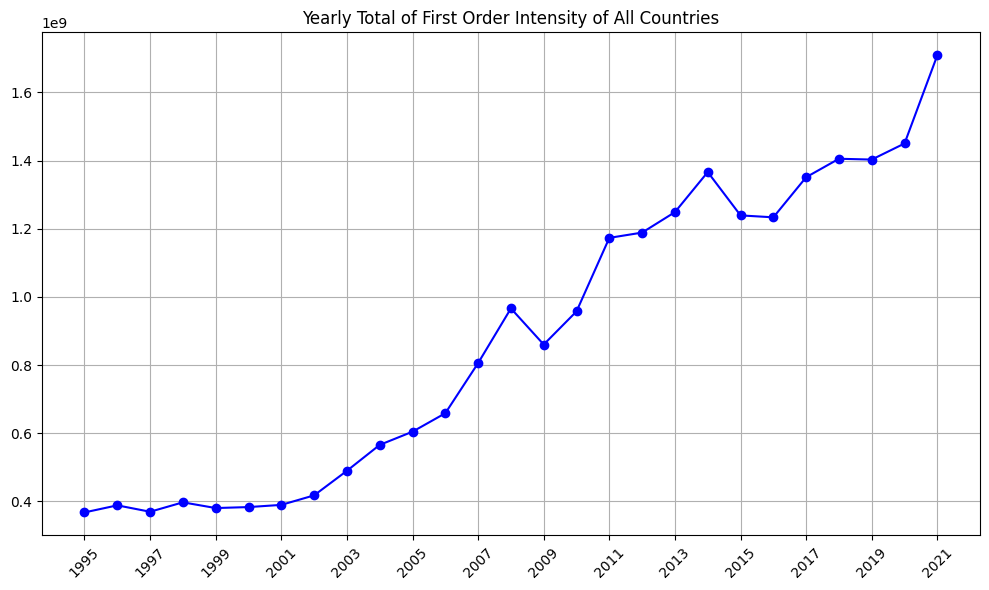

In [26]:
# FO TRADELINKS
import matplotlib.pyplot as plt

yearly_sum = eigenvector_centralities_long.groupby('Year')['First Order'].sum().reset_index()

yearly_sum.columns = ['Year', 'Total Value']

plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['Year'], yearly_sum['Total Value'], marker='o', linestyle='-', color='b')
plt.title('Yearly Total of First Order Intensity of All Countries')
plt.grid(True)

# Set xticks to show only alternative years and rotate them by 45 degrees
years = yearly_sum['Year']
plt.xticks(ticks=years[::2], labels=years[::2], rotation=45)

plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

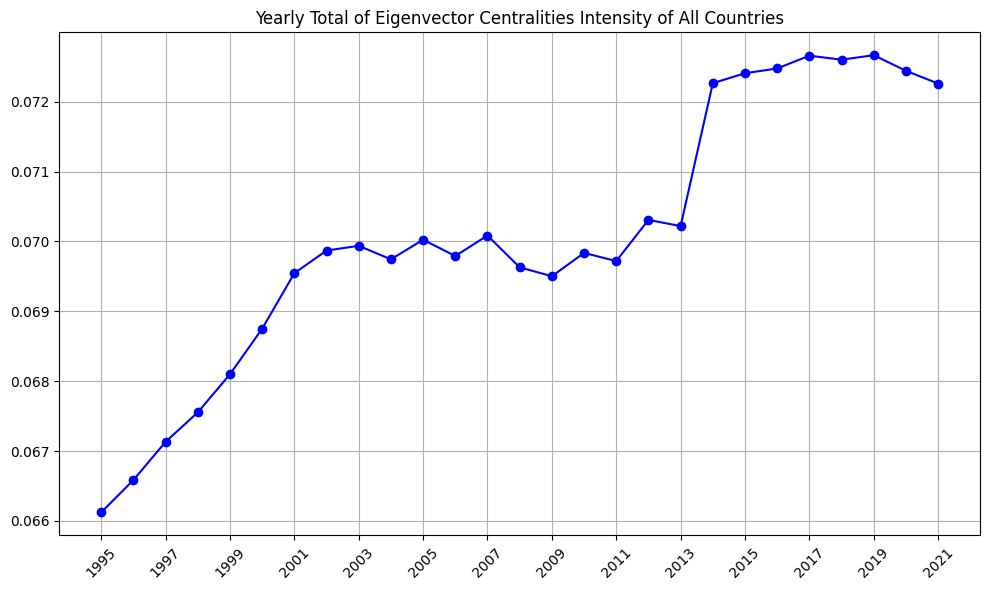

In [19]:
# FO TRADELINKS
import matplotlib.pyplot as plt

yearly_sum = eigenvector_centralities_long.groupby('Year')['Eigenvector Centrality'].mean().reset_index()

yearly_sum.columns = ['Year', 'Total Value']

plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['Year'], yearly_sum['Total Value'], marker='o', linestyle='-', color='b')
plt.title('Yearly Total of Eigenvector Centralities Intensity of All Countries')
plt.grid(True)

# Set xticks to show only alternative years and rotate them by 45 degrees
years = yearly_sum['Year']
plt.xticks(ticks=years[::2], labels=years[::2], rotation=45)

plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

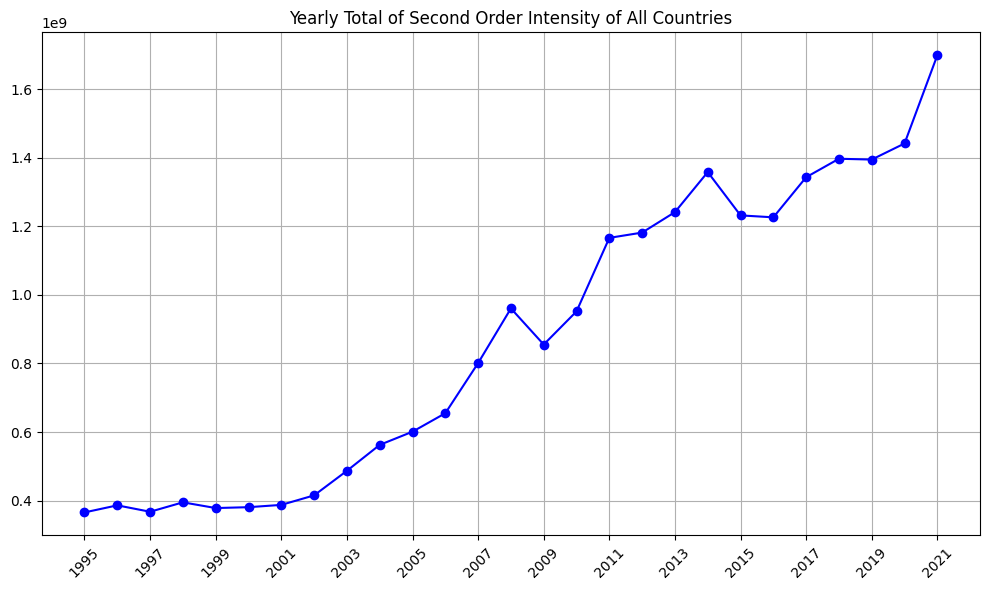

In [20]:
# FO TRADELINKS
import matplotlib.pyplot as plt

yearly_sum = eigenvector_centralities_long.groupby('Year')['Second Degree Tradelinks'].mean().reset_index()

yearly_sum.columns = ['Year', 'Total Value']

plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['Year'], yearly_sum['Total Value'], marker='o', linestyle='-', color='b')
plt.title('Yearly Total of Second Order Intensity of All Countries')
plt.grid(True)

# Set xticks to show only alternative years and rotate them by 45 degrees
years = yearly_sum['Year']
plt.xticks(ticks=years[::2], labels=years[::2], rotation=45)

plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

c:\Users\defaultuser0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\defaultuser0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\defaultuser0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


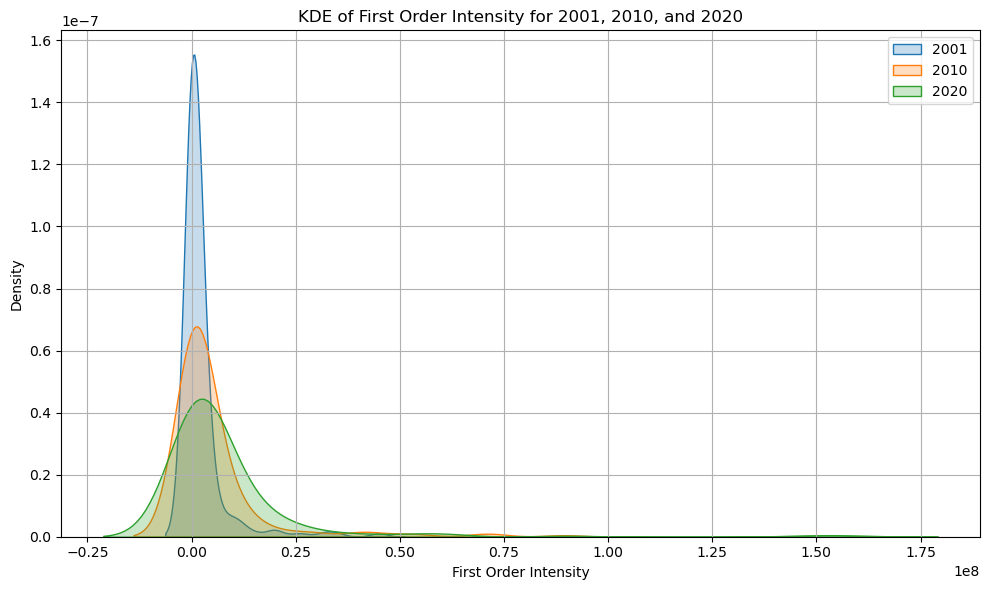

In [3]:
import seaborn as sns

# Assuming df is your DataFrame
# Filter for the years 2001, 2010, and 2020
df_filtered = eigenvector_centralities_long[eigenvector_centralities_long['Year'].isin([2001, 2010, 2020])]

# Plot KDEs for the specified years
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2001]['First Order'], label='2001', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2010]['First Order'], label='2010', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2020]['First Order'], label='2020', fill=True)

plt.title('KDE of First Order Intensity for 2001, 2010, and 2020')
plt.xlabel('First Order Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
eigenvector_centralities_long = pd.read_excel("C:\\Users\\defaultuser0\\Desktop\\ILR Sneha\\Trade_Intensity.xlsx")

c:\Users\defaultuser0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\defaultuser0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\defaultuser0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


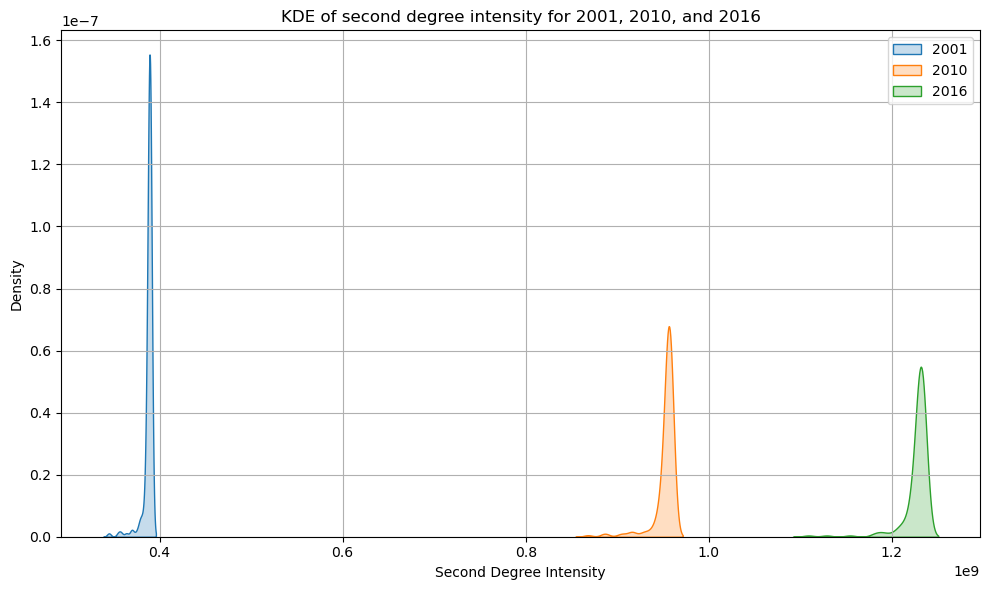

In [7]:
import seaborn as sns

# Assuming df is your DataFrame
# Filter for the years 2001, 2010, and 2020
df_filtered = eigenvector_centralities_long[eigenvector_centralities_long['Year'].isin([2001, 2010, 2016])]

# Plot KDEs for the specified years
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2001]['Second Degree Tradelinks'], label='2001', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2010]['Second Degree Tradelinks'], label='2010', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2016]['Second Degree Tradelinks'], label='2016', fill=True)

plt.title('KDE of second degree intensity for 2001, 2010, and 2016')
plt.xlabel('Second Degree Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


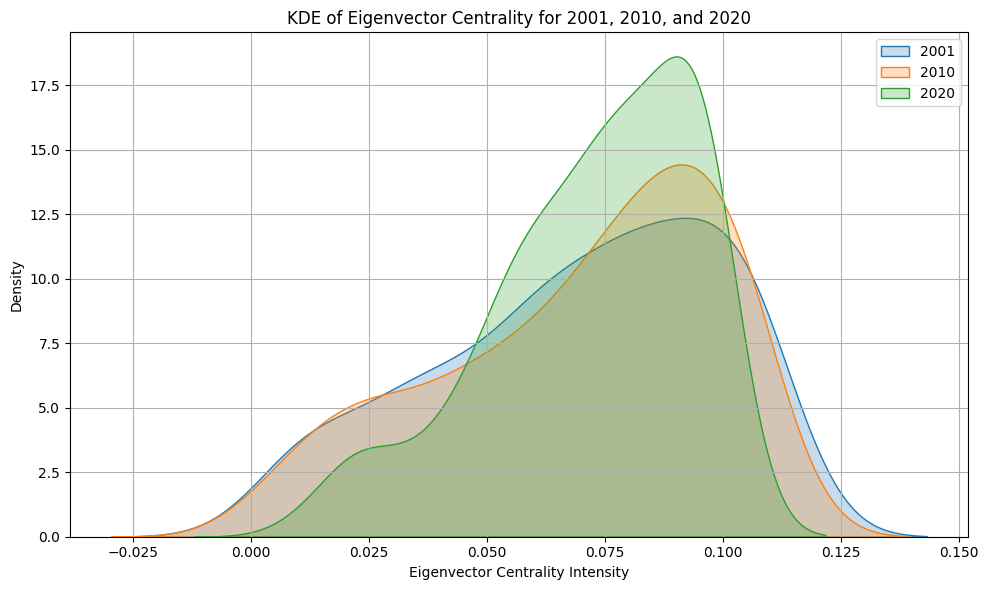

In [25]:
import seaborn as sns

# Assuming df is your DataFrame
# Filter for the years 2001, 2010, and 2020
df_filtered = eigenvector_centralities_long[eigenvector_centralities_long['Year'].isin([2001, 2010, 2020])]

# Plot KDEs for the specified years
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2001]['Eigenvector Centrality'], label='2001', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2010]['Eigenvector Centrality'], label='2010', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2020]['Eigenvector Centrality'], label='2020', fill=True)

plt.title('KDE of Eigenvector Centrality for 2001, 2010, and 2020')
plt.xlabel('Eigenvector Centrality Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()